In [ ]:
%pip install datasets

In [ ]:
from datasets import load_dataset
ds = load_dataset("jahjinx/IMDb_movie_reviews")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 36000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
})

In [ ]:
import pandas as pd
train_df = pd.DataFrame(ds['train'])
val_df = pd.DataFrame(ds['validation'])
test_df = pd.DataFrame(ds['test'])

In [ ]:
print(f"Shape of training data: {train_df.shape}")
print(f"Shape of validation data: {val_df.shape}")
print(f"Shape of testing data: {test_df.shape}")

Shape of training data: (36000, 2)
Shape of validation data: (4000, 2)
Shape of testing data: (10000, 2)


In [ ]:
train_df.head()

,text,label
0,"Beautifully photographed and ably acted, gener...",0
1,"Well, where to start describing this celluloid...",0
2,I first caught the movie on its first run on H...,1
3,I love Umberto Lenzi's cop movies -- ROME ARME...,0
4,I generally won't review movies I haven't seen...,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36000 non-null  object
 1   label   36000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 562.6+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4000 non-null   object
 1   label   4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


In [ ]:
train_df.isna().sum()

,0
text,0
label,0


In [ ]:
train_df.duplicated().sum()

233

In [ ]:
test_df.duplicated().sum()

19

In [ ]:
val_df.duplicated().sum()

1

In [ ]:
train_df[train_df.duplicated()]

,text,label
1568,Leos Carax has made 3 great movies: Boys Meet ...,1
2011,* Some spoilers *<br /><br />This movie is som...,0
2209,Holy freaking God all-freaking-mighty. This mo...,0
2584,Loved today's show!!! It was a variety and not...,1
3350,Since I am required to write minimum of 10 lin...,0
...,...,...
35333,This movie was a rather odd viewing experience...,0
35736,"Yes, bad acting isn't only one thing to mentio...",0
35784,I just don't understand why anytime someone do...,0
35887,Homicide: The Movie proved to be a good wrap-u...,1


In [ ]:
test_df[test_df.duplicated()]

,text,label
3210,Apart from the fact that this film was made ( ...,0
3572,this movie sucks. did anyone notice that the e...,0
3780,This was a very brief episode that appeared in...,0
3784,"<br /><br />Back in his youth, the old man had...",0
4558,"**SPOILERS** I rented ""Tesis"" (or ""Thesis"" in ...",0
5152,There's something frustrating about watching a...,0
5370,Dr. Seuss would sure be mad right now if he wa...,0
5769,By far this has to be one of the worst movies ...,0
6830,Walker Texas Ranger is one of the worst shows ...,0
6968,"Oh God,what an idiotic movie!Incredibly cheap ...",0


In [ ]:
val_df[val_df.duplicated()]

,text,label
3093,The movie contains a very short scene of Deneu...,0


In [ ]:
train_df.drop_duplicates(inplace=True)

In [ ]:
test_df.drop_duplicates(inplace=True)

In [ ]:
val_df.drop_duplicates(inplace=True)

In [ ]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())
print(val_df.duplicated().sum())

0
0
0


In [ ]:
train_df[(train_df['text'].str.strip() == '')]

,text,label


In [ ]:
train_df['text'] = train_df['text'].str.lower()

In [ ]:
train_df.head()

,text,label
0,"beautifully photographed and ably acted, gener...",0
1,"well, where to start describing this celluloid...",0
2,i first caught the movie on its first run on h...,1
3,i love umberto lenzi's cop movies -- rome arme...,0
4,i generally won't review movies i haven't seen...,0


In [ ]:
train_df[train_df['text'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,text,label


In [ ]:
# Identify comments containing URLs
url_pattern = r'https?://\S+|www\.\S+'
comments_with_urls = train_df[train_df['text'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,text,label
33,"the secret of kells is one of the most unique,...",1
109,this story has held a special place in my hear...,1
225,this is a horrific re-make of the french movie...,0
693,for those of you who don't remember movies -- ...,0
879,unlike http://www.imdb.com/title/tt0098238/ th...,1


In [ ]:
import re

def remove_urls(text):
    # Regular expression to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)

train_df['text'] = train_df['text'].apply(remove_urls)
comments_with_urls = train_df[train_df['text'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,text,label


In [ ]:
def remove_html_tags(text):
    html_tag_pattern = r'<.*?>'
    return re.sub(html_tag_pattern, '', text)

train_df['text'] = train_df['text'].apply(remove_html_tags)

label
1    17982
0    17785
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

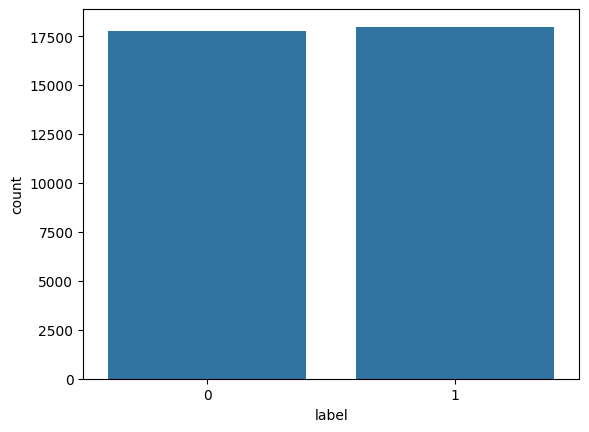

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes
print(train_df['label'].value_counts())
sns.countplot(data=train_df,x="label")

In [ ]:
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

In [ ]:
train_df.head()

,text,label,word_count
0,"beautifully photographed and ably acted, gener...",0,112
1,"well, where to start describing this celluloid...",0,302
2,i first caught the movie on its first run on h...,1,157
3,i love umberto lenzi's cop movies -- rome arme...,0,666
4,i generally won't review movies i haven't seen...,0,300


In [ ]:
train_df['word_count'].describe()

,word_count
count,35767.000000
mean,232.221657
std,172.480163
min,4.000000
25%,127.000000
50%,174.000000
75%,282.000000
max,2470.000000


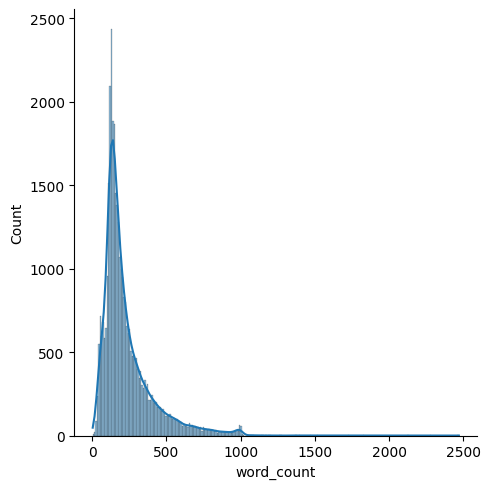

In [ ]:
sns.displot(train_df['word_count'], kde=True)

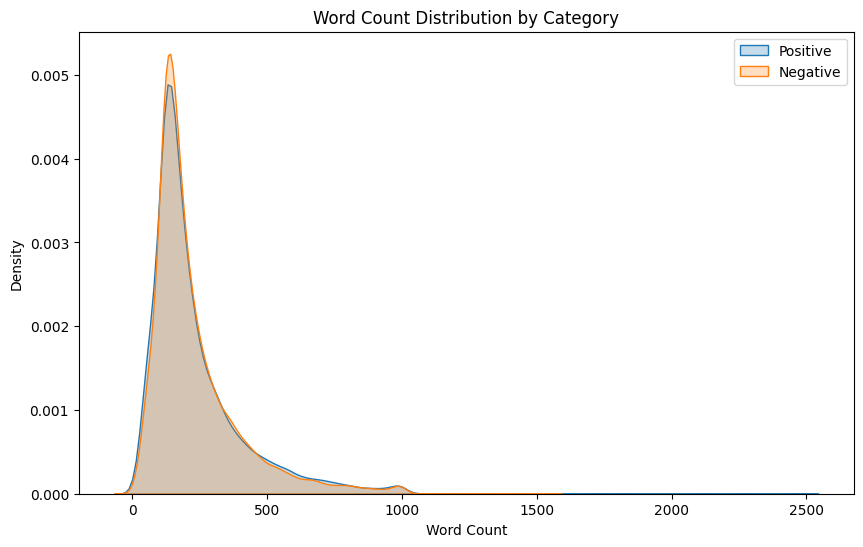

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(train_df[train_df['label'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(train_df[train_df['label'] == 0]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

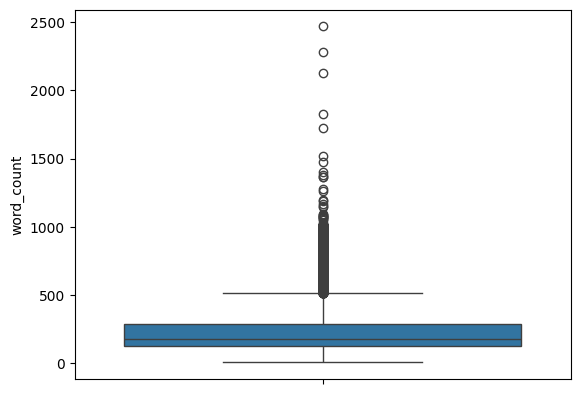

In [ ]:
sns.boxplot(train_df['word_count'])

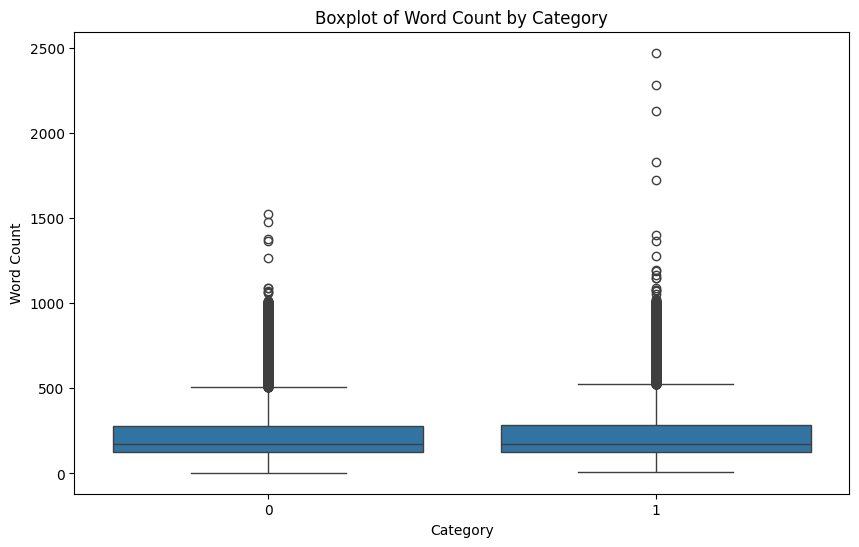

In [ ]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='label', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='label', ylabel='word_count'>

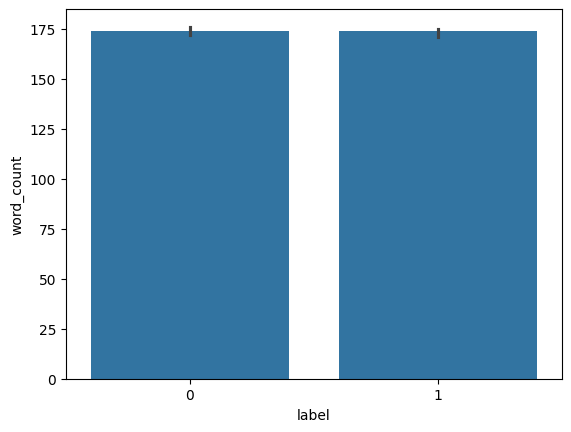

In [ ]:
# median word counts among sentiments

sns.barplot(train_df,x='label',y='word_count',estimator='median')

<Axes: xlabel='label', ylabel='word_count'>

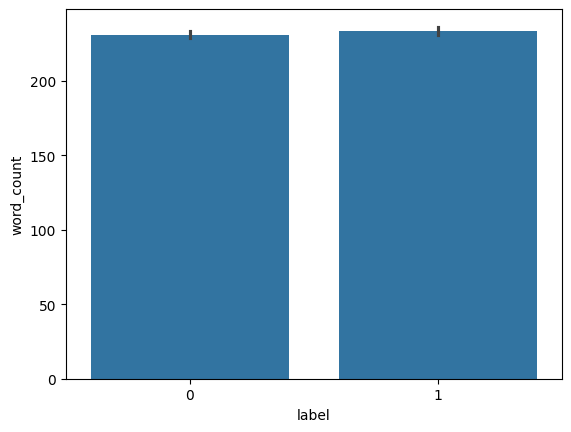

In [ ]:
sns.barplot(train_df,x='label',y='word_count',estimator='mean')

In [ ]:
!pip install nltk

In [ ]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
train_df['num_stop_words'] = train_df['text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_df.head()

,text,label,word_count,num_stop_words
0,"beautifully photographed and ably acted, gener...",0,112,53
1,"well, where to start describing this celluloid...",0,302,114
2,i first caught the movie on its first run on h...,1,157,68
3,i love umberto lenzi's cop movies -- rome arme...,0,666,299
4,i generally won't review movies i haven't seen...,0,300,132


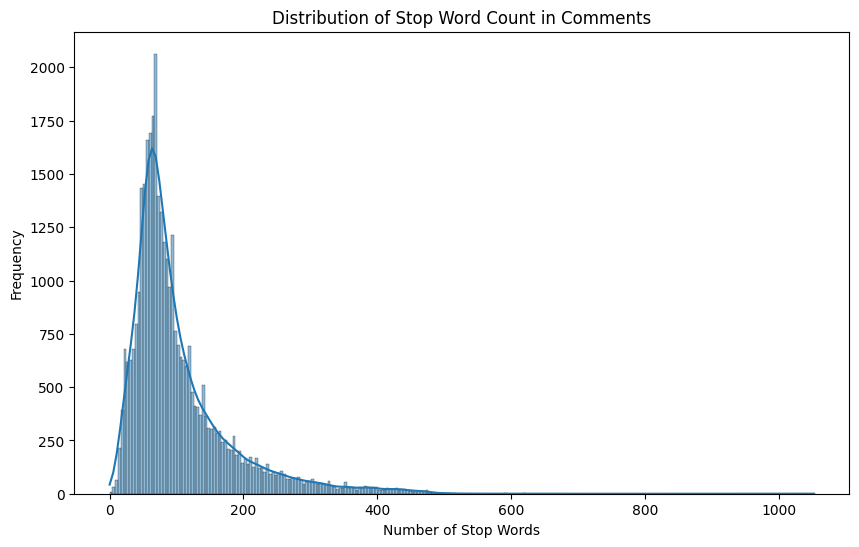

In [ ]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(train_df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

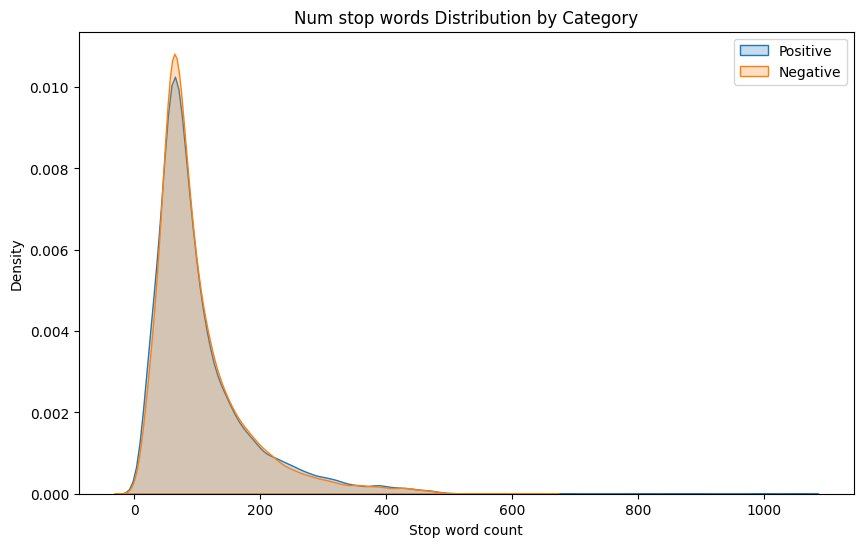

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(train_df[train_df['label'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(train_df[train_df['label'] == 0]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='label', ylabel='num_stop_words'>

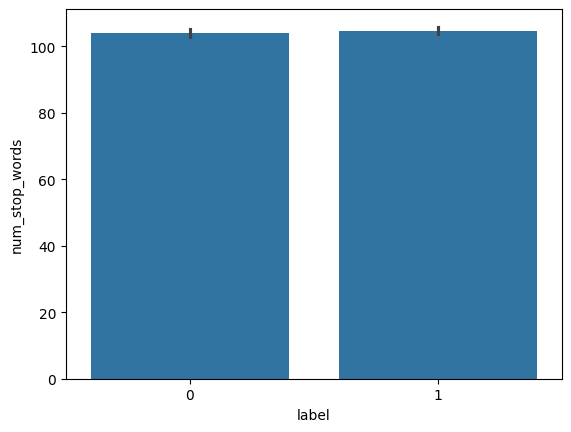

In [ ]:
sns.barplot(train_df,x='label',y='num_stop_words',estimator='mean')

<ipython-input-56-616354635edd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


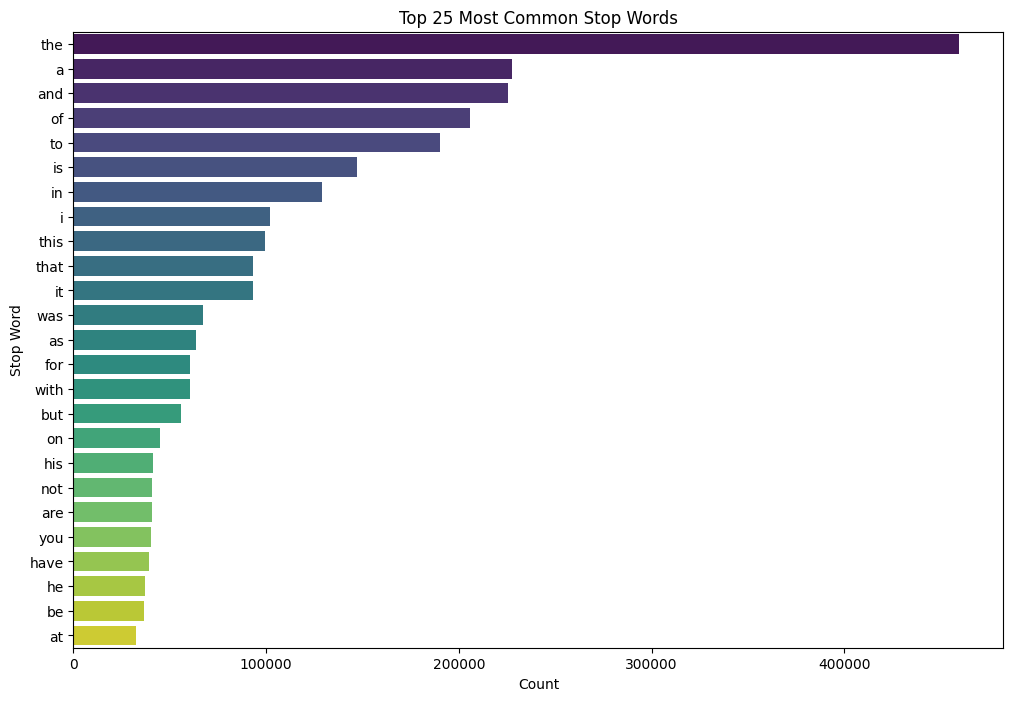

In [ ]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in train_df['text'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [ ]:
train_df['num_chars'] = train_df['text'].apply(len)

train_df.head()

,text,label,word_count,num_stop_words,num_chars
0,"beautifully photographed and ably acted, gener...",0,112,53,654
1,"well, where to start describing this celluloid...",0,302,114,1660
2,i first caught the movie on its first run on h...,1,157,68,865
3,i love umberto lenzi's cop movies -- rome arme...,0,666,299,3747
4,i generally won't review movies i haven't seen...,0,300,132,1654


In [ ]:
train_df['num_chars'].describe()

,num_chars
count,35767.000000
mean,1315.227081
std,995.764810
min,32.000000
25%,700.000000
50%,975.000000
75%,1596.000000
max,13704.000000


In [ ]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(train_df['text'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [ ]:
char_frequency_df['character'].values

array([' ', 'e', 't', 'a', 'i', 'o', 's', 'n', 'r', 'h', 'l', 'd', 'c',
       'm', 'u', 'f', 'g', 'y', 'b', 'w', 'p', '.', 'v', ',', 'k', "'",
       '/', '>', '<', '-', '"', 'j', 'x', ')', '(', '!', 'z', 'q', '0',
       '1', '?', ':', '9', '2', '*', ';', '3', '5', '8', '7', '4', '&',
       '6', 'é', '\x96', '`', '$', '\x85', '%', '_', '+', '#', '\x97',
       '´', '=', '~', ']', 'á', '[', '’', 'ö', '@', '}', '{', 'è', '\x91',
       '–', '£', 'ü', 'ó', 'ä', 'í', '^', '\t', '¨', 'à', 'ñ', 'ç', '»',
       '«', 'ï', '¡', 'ô', '|', 'å', 'â', 'ã', '“', '”', '\x84', '½',
       '\\', 'ë', '·', 'ê', 'ú', '\x95', 'ø', '¦', 'ý', '‘', '\xa0', '§',
       '…', 'ð', 'æ', 'ß', '\uf0b7', 'ù', '\x80', 'ì', '、', 'õ', 'î',
       '\xad', 'û', '°', '\x08', '®', '\x8d', '¾', 'ò', '¤', '，', '▼',
       '★', 'º', '©', 'ן', 'ל', 'ª', 'ו', 'מ', 'ר', 'כ', 'ı', 'א', 'ג',
       'י', 'ż', '¿', '³', 'þ', '¢', 'ğ', 'ō', '\x9a'], dtype=object)

In [ ]:
char_frequency_df.tail(50)

,character,frequency
121,ø,16
138,¦,14
77,ý,14
124,‘,11
47,,11
139,§,11
123,…,8
130,ð,8
74,æ,8
108,ß,7


<ipython-input-67-0292ce2e486a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


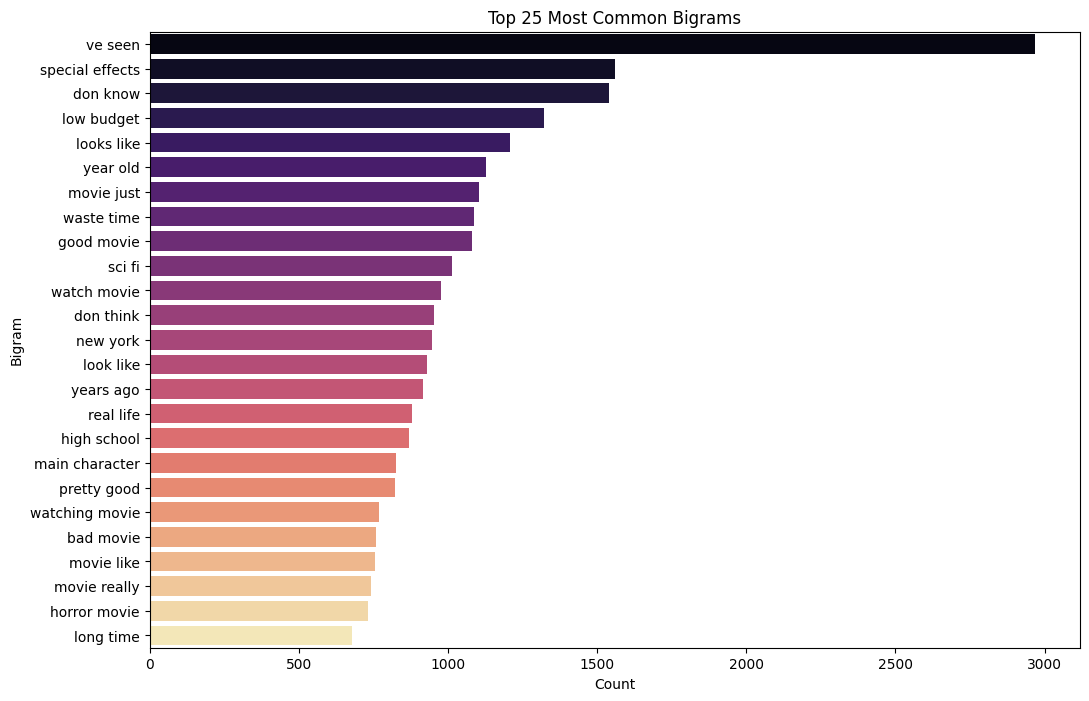

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(train_df['text'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

<ipython-input-68-9fe3390bb3c1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


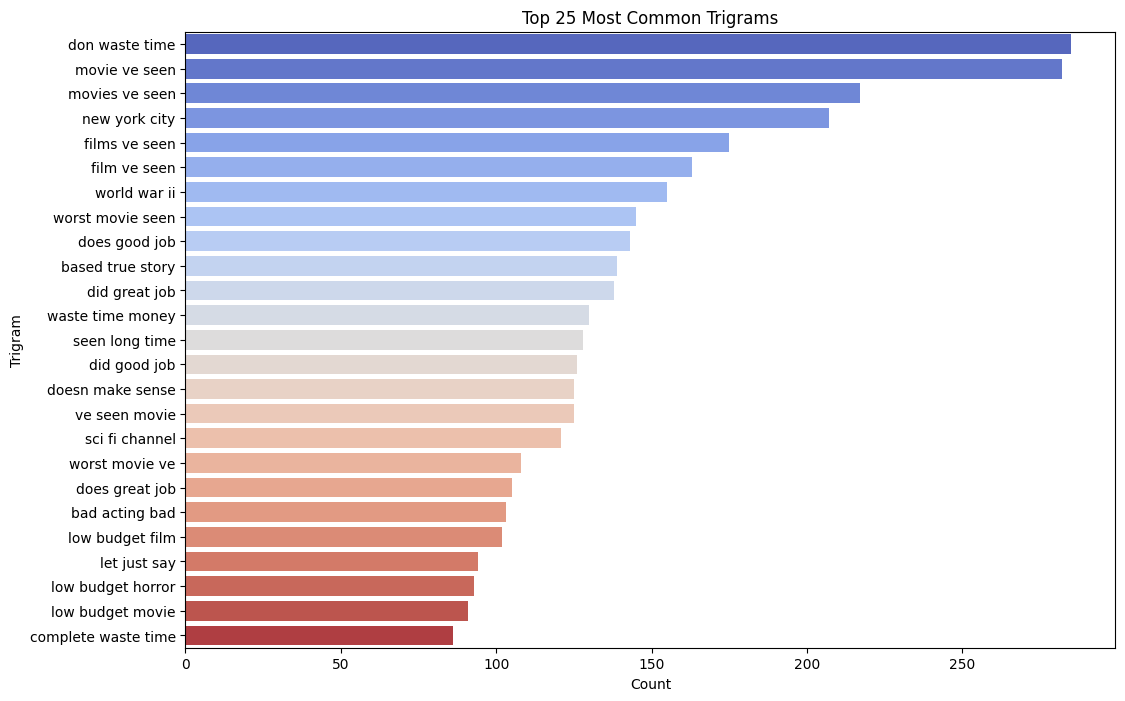

In [ ]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(train_df['text'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation


train_df['text'] = train_df['text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [ ]:
all_text = ' '.join(train_df['text'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
9,,8159367
1,e,4380332
4,t,3438453
2,a,2952767
5,i,2813804
12,o,2736167
20,s,2487255
16,n,2423843
14,r,2054752
11,h,1998461


In [ ]:
train_df.head()

,text,label,word_count,num_stop_words,num_chars
0,"beautifully photographed and ably acted, gener...",0,112,53,654
1,"well, where to start describing this celluloid...",0,302,114,1660
2,i first caught the movie on its first run on h...,1,157,68,865
3,i love umberto lenzis cop movies rome armed t...,0,666,299,3747
4,i generally wont review movies i havent seen i...,0,300,132,1654


In [ ]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
train_df['text'] = train_df['text'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)


In [ ]:
train_df.head()

,text,label,word_count,num_stop_words,num_chars
0,"beautifully photographed ably acted, generally...",0,112,53,654
1,"well, start describing celluloid debacle? alre...",0,302,114,1660
2,first caught movie first run hbo probably 1981...,1,157,68,865
3,love umberto lenzis cop movies rome armed teet...,0,666,299,3747
4,generally wont review movies havent seen awhil...,0,300,132,1654


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
train_df['text'] = train_df['text'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

train_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label,word_count,num_stop_words,num_chars
0,"beautifully photographed ably acted, generally...",0,112,53,654
1,"well, start describing celluloid debacle? alre...",0,302,114,1660
2,first caught movie first run hbo probably 1981...,1,157,68,865
3,love umberto lenzis cop movie rome armed teeth...,0,666,299,3747
4,generally wont review movie havent seen awhile...,0,300,132,1654


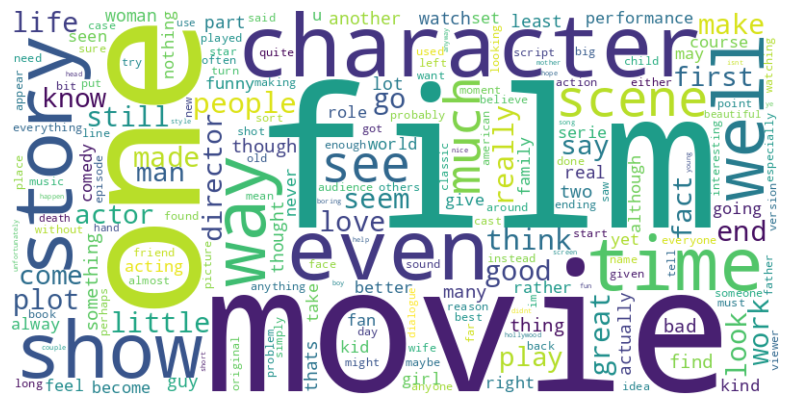

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(train_df['text'])

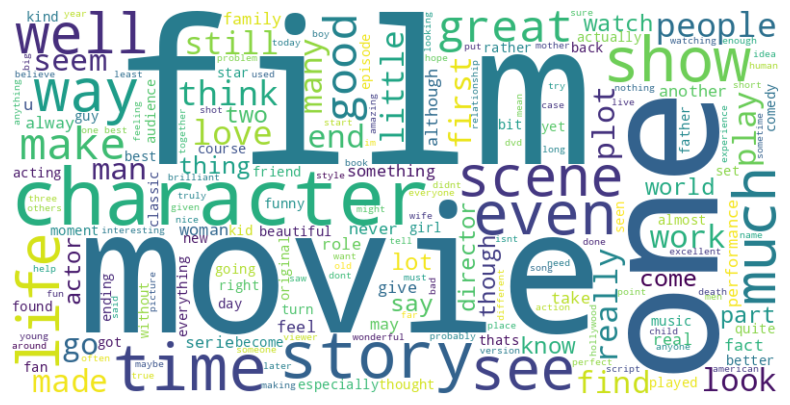

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(train_df[train_df['label'] == 1]['text'])

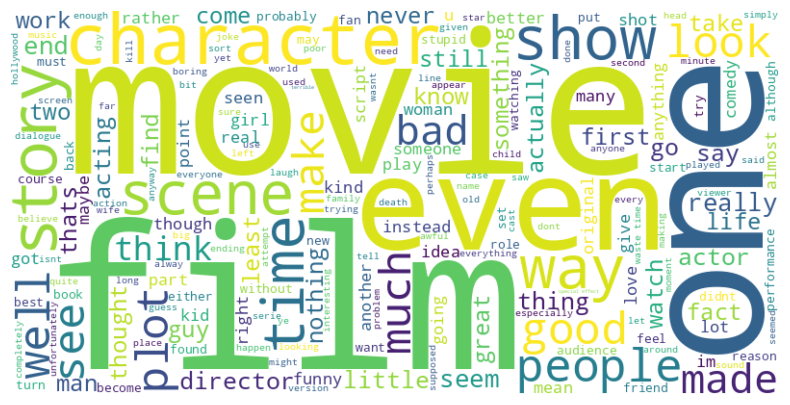

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(train_df[train_df['label'] == 0]['text'])

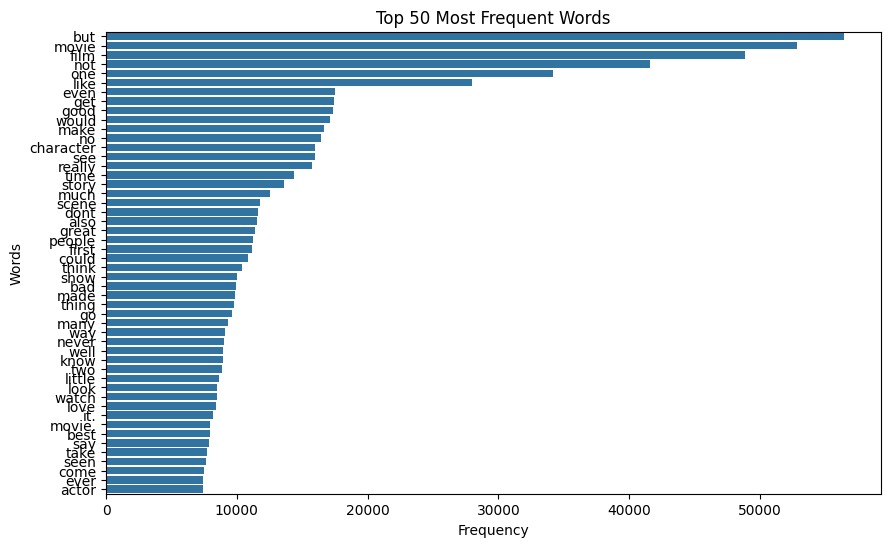

In [ ]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['text']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(train_df, n=50)